In [1]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd

# 평가지표 로드
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score,precision_score, recall_score, f1_score, confusion_matrix

# 학습 모델 로드
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# 분석 데이터 로드
from sklearn.datasets import load_wine

In [2]:
def evaluate_classifier(y_test, y_pred, roc = False):
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred): .4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average = 'macro'): .4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average = 'macro'): .4f}")
    print(f"F_SCORE: {f1_score(y_test, y_pred, average = 'macro'): .4f}")
    if roc:
        print(f"ROC_AUC: {roc_auc_score(y_test, y_pred, average = 'macro', multi_class = 'ovr'): .4f}")
    print(classification_report(y_test, y_pred))

In [3]:
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


In [4]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
wine_df["label"] = wine.target
wine_df.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0


In [6]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


* 대부분 feature 항목들의 min-max 편차가 큰 것으로 보아 이상치가 존재할 것으로 예상됨
* proline, magnesium 항목이 다른 컬럼값에 비해 스케일이 큼. 특히나 proline!
* 스케일 차이가 많이나는 경우 linear regression을 할 때 모델의 파라미터를 업데이트하는 과정에서 범위가 큰 컬럼 B의 파라미터만 집중적으로 업데이트하는 문제 발생 가능
* 정규화 과정이 필요할 것으로 보임.

---

# A_data visualization

### 1. histogram
* histogram을 통해 데이터 분포 파악

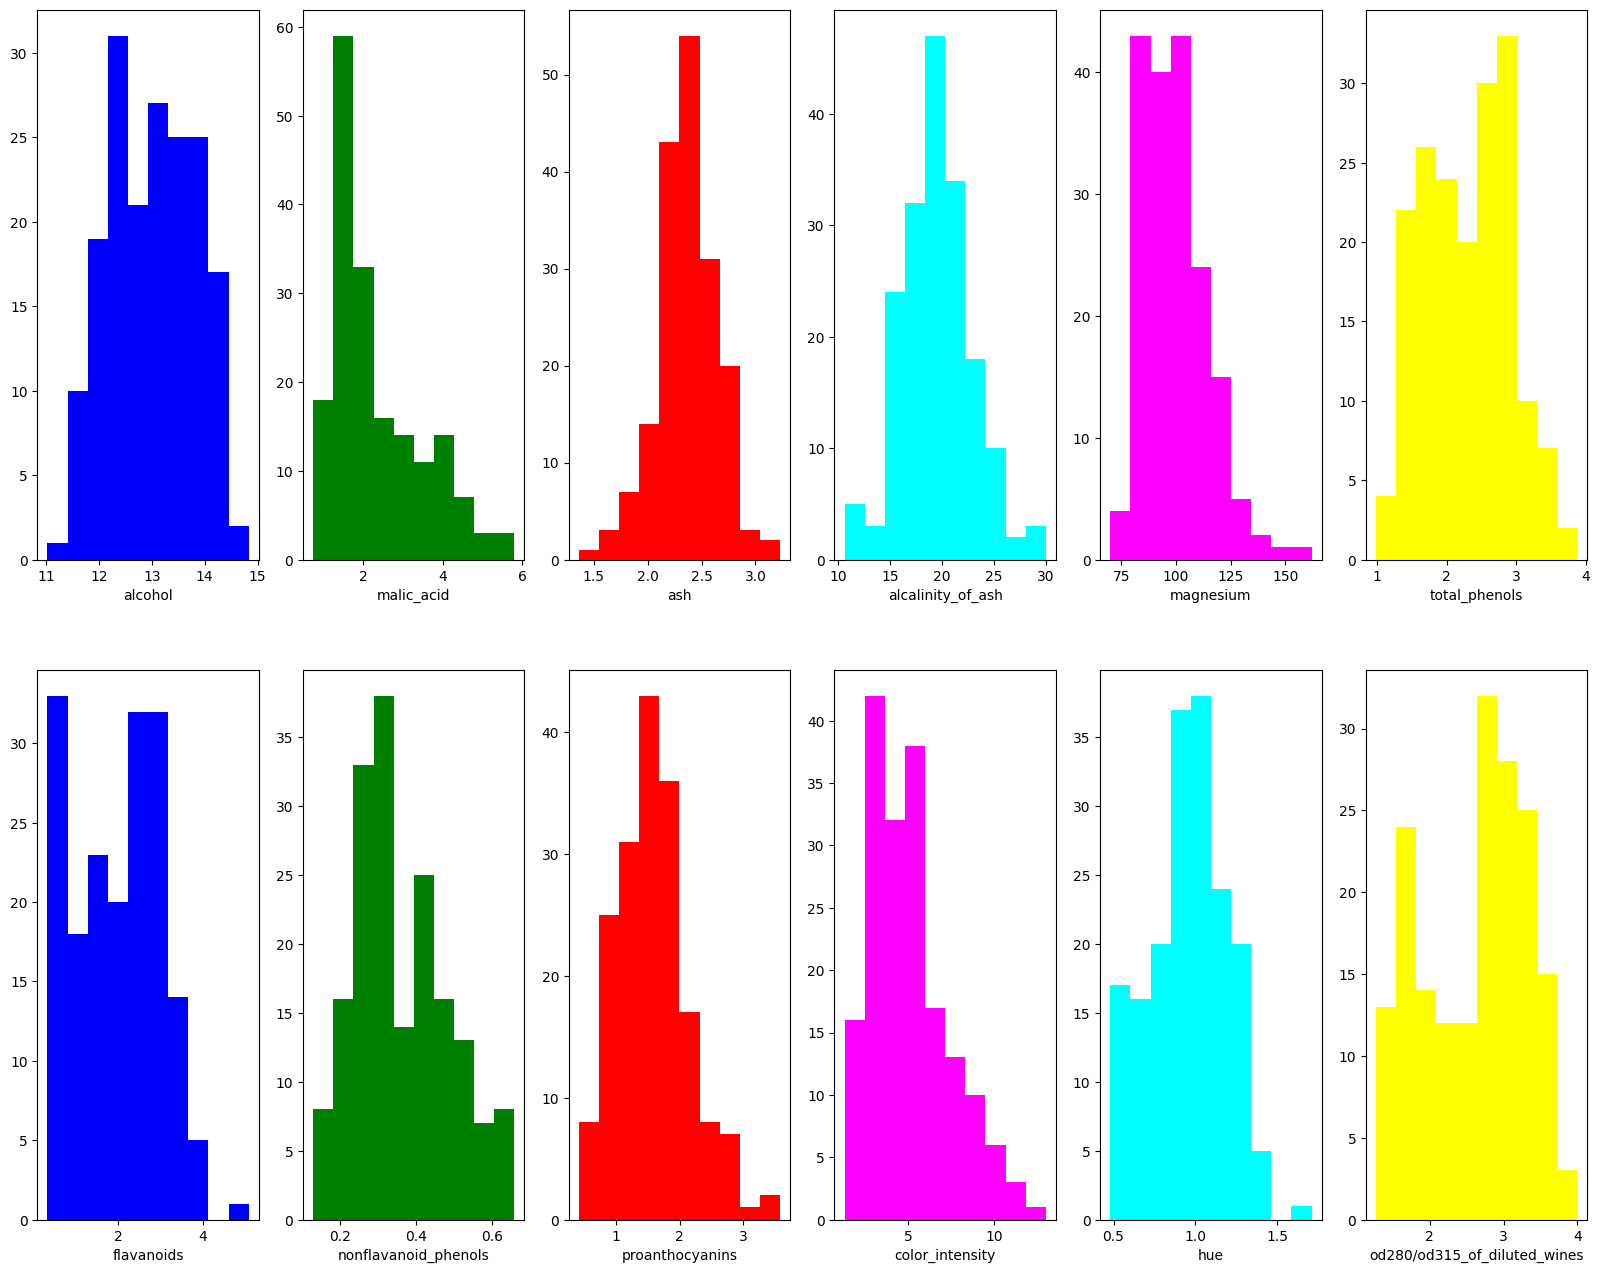

In [7]:
import matplotlib.pyplot as plt

plt.style.use('default')
colors = ['blue','green','red','cyan','magenta','yellow','blue','green','red','magenta','cyan','yellow']
plt.figure(figsize=(20, 50))
for i in range(1,13):
    plt.subplot(6, 6, i)
    plt.hist(wine_df[wine_df.columns[i-1]], color = colors[i-1])
    plt.xlabel(wine_df.columns[i-1])
plt.show()

### 2. heatmap
* heatmap을 통해 인자간 상관관계 파악

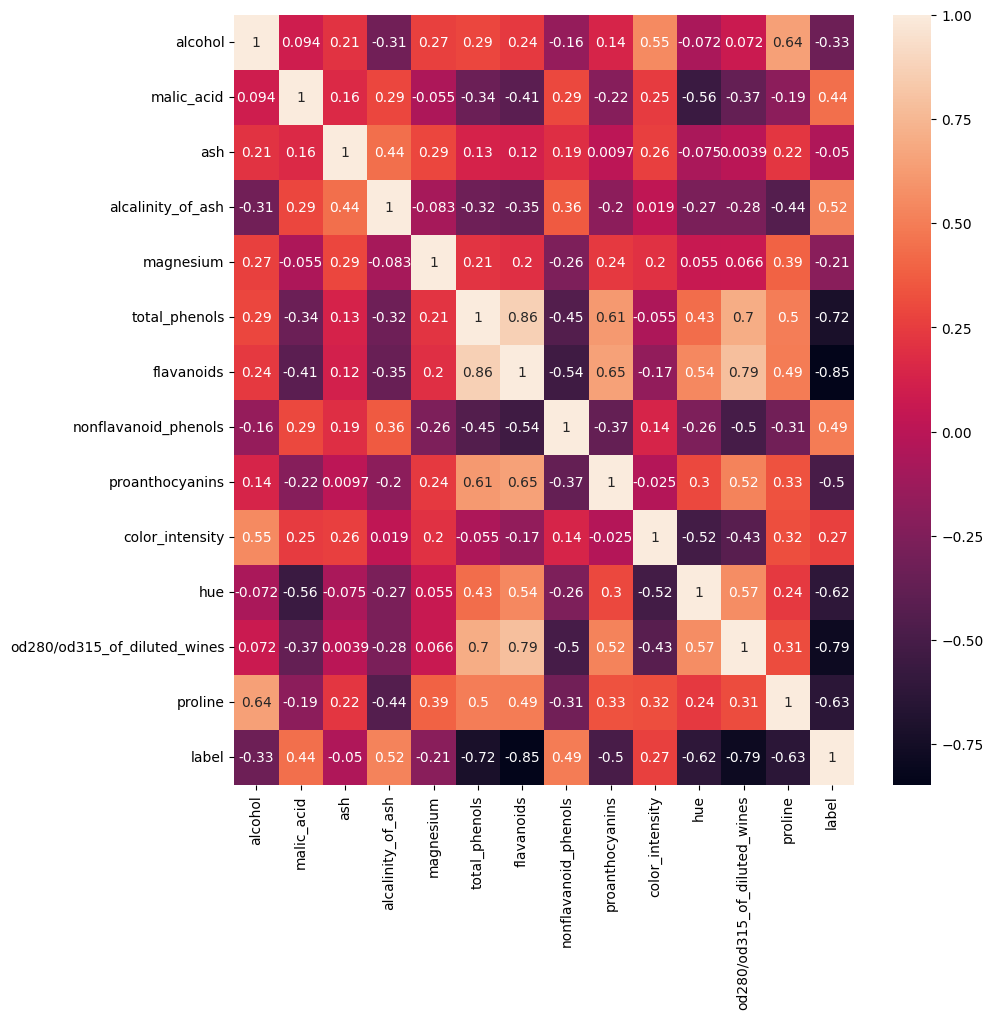

In [8]:
import seaborn as sns
plt.figure(figsize=(10,10))
correlations = wine_df[wine_df.columns].corr(method='pearson')
sns.heatmap(correlations, annot = True)
plt.show()

# B_이상치 확인해보기

## (1) z-score method  
* 값-평균/표준편차로 z-score를 계산한 뒤 특정 기준을 넘는 데이터를 이상치라 판단
* 즉, __데이터 값이 "평균"과 얼마나 차이가 나는지__ 보여줌
* 한계점 
    1. 평균과 표준편차 자체가 이미 이상치의 영향을 받은 지표인데 이 값을 이용함.
    2. 데이터셋이 작은 경우 신뢰도가 떨어짐.

In [9]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

### 이상치인 데이터의 인덱스를 리턴하는 outlier 함수 생성

In [10]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index

In [11]:
wine_df.loc[outlier(wine_df, 'alcohol', 2)]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.2,1.08,2.85,1045.0,0
13,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.4,1.25,2.73,1150.0,0
115,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.9,1.71,2.87,407.0,1


### 비이상치인 데이터 추출

In [12]:
def not_outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col]) <=z ].index

In [13]:
wine_df.loc[not_outlier(wine_df, 'alcohol', 2)].head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


* wine 분류 데이터는 데이터셋이 적기 때문에 z-score에 따른 이상치 처리는 하지 않음

## (2) IQR (Interquartile range) method 
* IQR = Q3(제 3사분위수) - Q1(제 1사분위수)로, 데이터의 중간 50% 범위.
* X < (Q1 - 1.5 x IQR) or X > (Q3 + 1.5 x IQR) 에 해당하는 X를 이상치라 판단

In [14]:
import matplotlib.pyplot as plt

### box plot으로 전체 feature data의 이상치 여부 확인

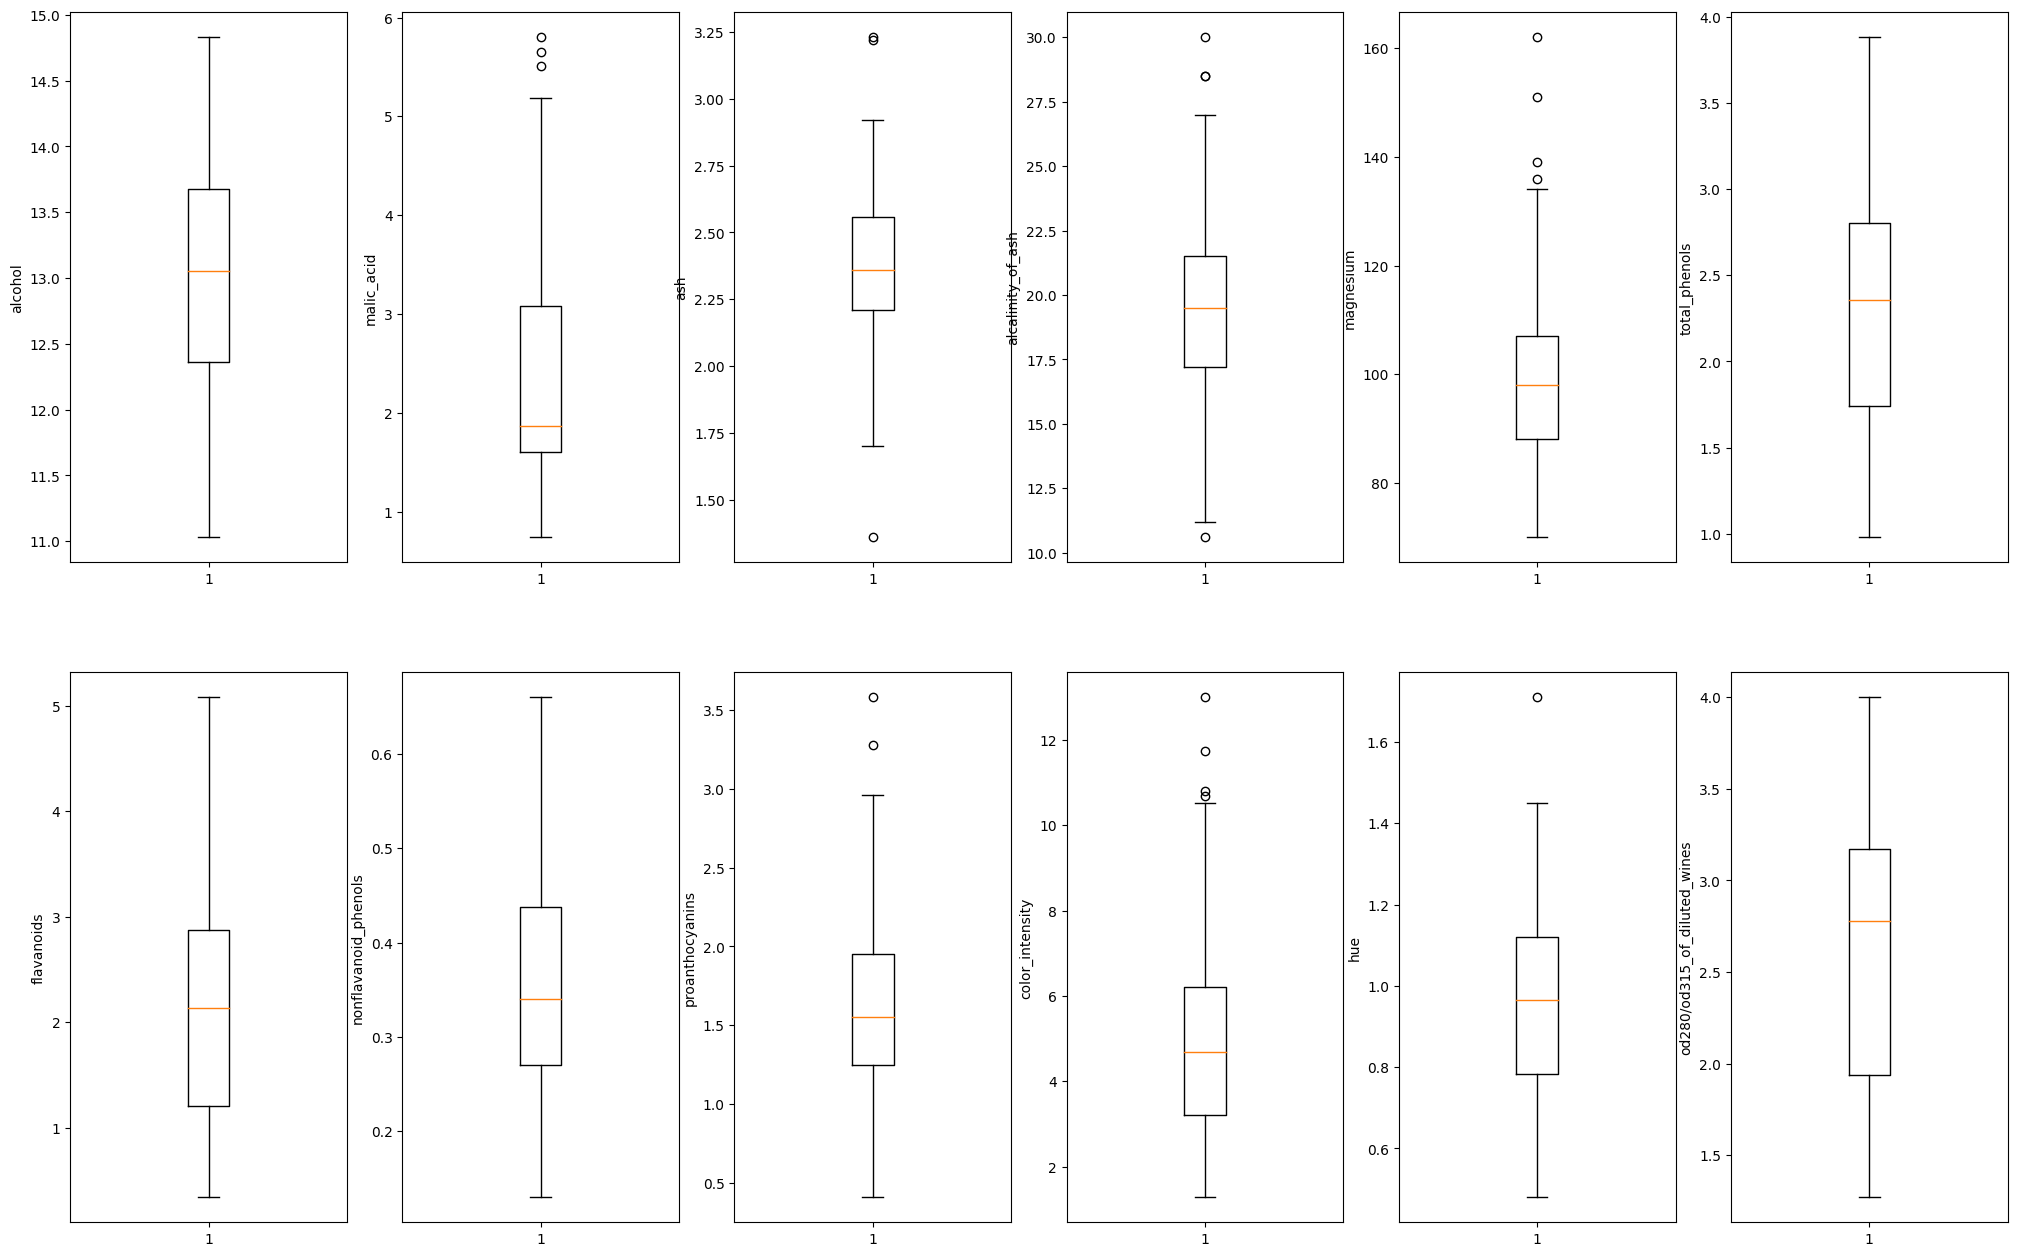

In [15]:
plt.style.use('default')
plt.figure(figsize=(25, 50))
for i in range(1,13):
    plt.subplot(6, 6, i)
    plt.boxplot(wine_df[wine_df.columns[i-1]])
    plt.ylabel(wine_df.columns[i-1])
plt.show()

#### 이상치를 갖는 인자는 : malic_acid, ash, alcalinity_of_ash, magnesium, proanthocyanins, color_intensity, hue 총 7가지

#### 이상치 판단 후 해야할 일
    1. 이상치 삭제 (or 이상치끼리 따로 분석)
    2. 이상치 다른 값으로 대체 (데이터양이 적은 경우 방안) 
        ex) 최댓값과 최솟값을 설정해 데이터 범위 제한
    3. 결측치처럼 다른 데이터를 활용하여 예측 모델 만들어서 예측값 활용
        ex) malic_acid는 heatmap 상으로 label과 가장 상관관계가 높으므로, 
            각 라벨별 malic_acid의 평균치를 구하여 대체
    4. binning을 통해 수치형 데이터를 범주형 데이터로 전환

# C_ 정규화(Normalization)
* 위에서 언급했듯, proline, magnesium 항목이 다른 컬럼값에 비해 스케일이 커서 정규화를 진행함

## (1) 표준화(Standardization)
* 데이터의 평균은 0, 분산은 1로 변환
* 표준화 방식은 보통 평균이 0이고 표준편차가 1인 즉, 피처가 가우시안 분포인 경우 유용

In [16]:
cols = wine.feature_names
wine_data_standardization = (wine_df[cols]-wine_df[cols].mean())/wine_df[cols].std()
wine_data_standardization.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


### 표준화를 진행한 데이터를 describe해보면 std가 1인것을 알 수 있음

In [17]:
wine_data_standardization.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.863872e-15,3.193450e-16,-4.067907e-15,-7.983626e-17,-1.995907e-17,3.991813e-17,9.181170e-16,-4.790176e-16,-1.676562e-15,-3.393041e-16,1.676562e-15,2.195497e-15,-7.983626e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.427388e+00,-1.428952e+00,-3.668813e+00,-2.663505e+00,-2.082381e+00,-2.101318e+00,-1.691200e+00,-1.862979e+00,-2.063214e+00,-1.629691e+00,-2.088840e+00,-1.889723e+00,-1.488987e+00
25%,-7.860275e-01,-6.568956e-01,-5.705131e-01,-6.871987e-01,-8.220960e-01,-8.829774e-01,-8.252115e-01,-7.380592e-01,-5.956034e-01,-7.928659e-01,-7.654033e-01,-9.495697e-01,-7.824306e-01
50%,6.082829e-02,-4.219218e-01,-2.375431e-02,1.514024e-03,-1.219377e-01,9.568993e-02,1.058511e-01,-1.755994e-01,-6.272092e-02,-1.587767e-01,3.303369e-02,2.370660e-01,-2.330629e-01
75%,8.337767e-01,6.679088e-01,6.961448e-01,6.003946e-01,5.082048e-01,8.067217e-01,8.466967e-01,6.078267e-01,6.274055e-01,4.925666e-01,7.111583e-01,7.863692e-01,7.561165e-01
max,2.253415e+00,3.100446e+00,3.147447e+00,3.145637e+00,4.359076e+00,2.532372e+00,3.054216e+00,2.395645e+00,3.475269e+00,3.425768e+00,3.292407e+00,1.955399e+00,2.963114e+00


### 표준화 전, 후 proline의 분포 변화 양상 보기

#### * 히스토그램상 proline과 가장 상관관계가 높았던 alcohol(x axis) 항목과 함께 도시화

Text(0.5, 1.0, 'Normalized Data')

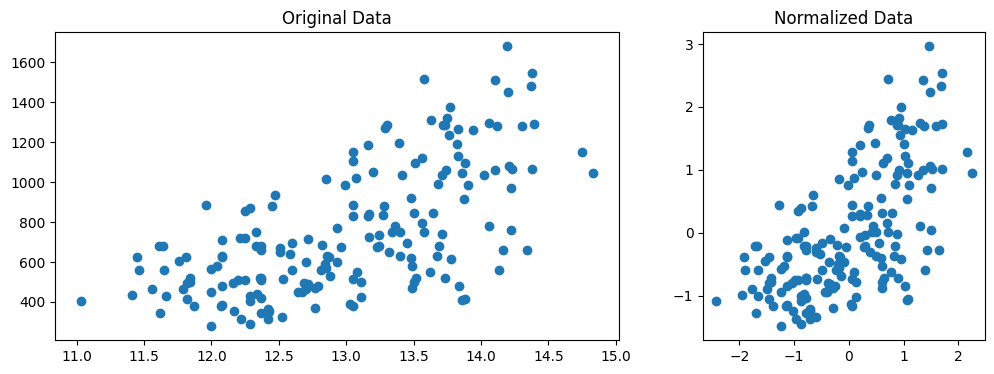

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), gridspec_kw={'width_ratios': [2,1]})

axs[0].scatter(wine_df['alcohol'], wine_df['proline'])
axs[0].set_title('Original Data')

axs[1].scatter(wine_data_standardization['alcohol'], wine_data_standardization['proline'])
axs[1].set_title('Normalized Data')

#### * 히스토그램상 proline과 가장 상관관계가 낮았던 label(x axis) 항목과 함께 도시화

In [19]:
wine_data_standardization['label'] = wine.target
wine_data_standardization

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,0
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526,0
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224,0
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007,0
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.873810,2.966176,0.304301,0.300954,-0.331985,-0.982841,-1.420891,1.270726,-0.927563,1.139596,-1.388840,-1.227742,-0.021890,2
174,0.491955,1.408636,0.413653,1.049555,0.158126,-0.791103,-1.280731,0.547563,-0.316058,0.967055,-1.126341,-1.481267,0.009866,2
175,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786,2
176,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664,2


Text(0.5, 1.0, 'Normalized Data')

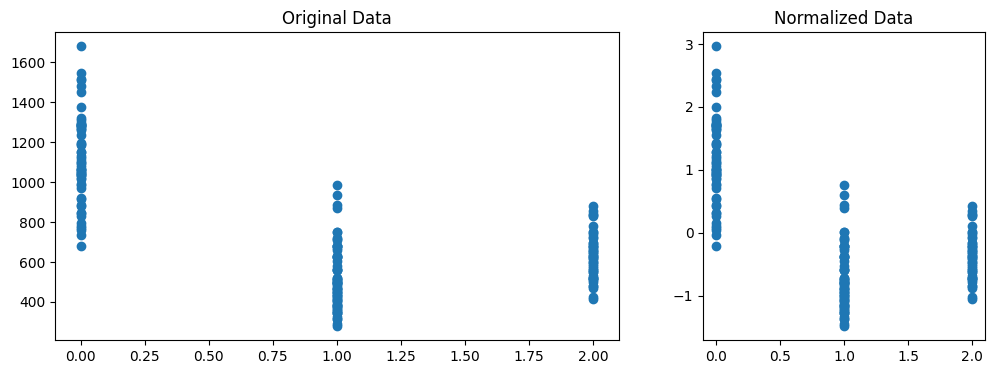

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), gridspec_kw={'width_ratios': [2,1]})

axs[0].scatter(wine_df['label'], wine_df['proline'])
axs[0].set_title('Original Data')

axs[1].scatter(wine_data_standardization['label'], wine_data_standardization['proline'])
axs[1].set_title('Normalized Data')

## (2) Min-Max Scaling
* 데이터의 최솟값은 0, 최댓값은 1로 변환
* 피처 크기가 다르거나, 데이터 분포에 대해 모를 경우 유용

In [82]:
wine_df[cols] = (wine_df[cols]-wine_df[cols].min())/(wine_df[cols].max()-wine_df[cols].min())
minmax_wine = wine_df
minmax_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,2
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,2
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,2
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,2


# D_다양한 모델로 학습

## D-0) 데이터 준비

### D-01)표준화(normalization)한 데이터프레임 X, y 분류

In [45]:
wine_data_standardization

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,0
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526,0
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224,0
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007,0
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.873810,2.966176,0.304301,0.300954,-0.331985,-0.982841,-1.420891,1.270726,-0.927563,1.139596,-1.388840,-1.227742,-0.021890,2
174,0.491955,1.408636,0.413653,1.049555,0.158126,-0.791103,-1.280731,0.547563,-0.316058,0.967055,-1.126341,-1.481267,0.009866,2
175,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786,2
176,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664,2


* dataframe으로 되어있는 데이터를 ndarray타입의 X, y로 나누는 방법

In [57]:
X = wine_data_standardization[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 
                              'magnesium', 'total_phenols','flavanoids', 'nonflavanoid_phenols',
                              'proanthocyanins', 'color_intensity', 'hue', 
                              'od280/od315_of_diluted_wines', 'proline']].values
X.shape

(178, 13)

In [49]:
y = wine_data_standardization['label'].values
y.shape

(178,)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [58]:
X_train.shape, X_test.shape

((142, 13), (36, 13))

In [59]:
y_train.shape, y_test.shape

((142,), (36,))

### D-02) min_max scaling한 데이터프레임 X, y 분류

In [85]:
X_mm = minmax_wine[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 
                              'magnesium', 'total_phenols','flavanoids', 'nonflavanoid_phenols',
                              'proanthocyanins', 'color_intensity', 'hue', 
                              'od280/od315_of_diluted_wines', 'proline']].values
X_mm.shape

(178, 13)

In [86]:
y_mm = minmax_wine['label'].values
y_mm.shape

(178,)

In [87]:
X_mm_train, X_mm_test, y_mm_train, y_mm_test = train_test_split(X_mm, y_mm, test_size=0.1, random_state=4)

In [88]:
X_mm_train.shape, X_mm_test.shape

((160, 13), (18, 13))

In [89]:
y_mm_train.shape, y_mm_test.shape

((160,), (18,))

## D-1) 표준화한 데이터로 학습

### 1. Decision tree model

In [61]:
decision_tree = DecisionTreeClassifier(random_state = 15)

In [62]:
decision_tree.fit(X_train, y_train)
y_DTpred = decision_tree.predict(X_test)

In [63]:
evaluate_classifier(y_test, y_DTpred)

Accuracy:  0.8889
Precision:  0.9030
Recall:  0.8974
F_SCORE:  0.8930
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.80      0.92      0.86        13
           2       1.00      0.77      0.87        13

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.90      0.89      0.89        36



In [64]:
confusion_matrix(y_test, y_DTpred)

array([[10,  0,  0],
       [ 1, 12,  0],
       [ 0,  3, 10]], dtype=int64)

### 2. Random forest model

In [65]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=15)

In [66]:
random_forest.fit(X_train, y_train)
y_RFpred = random_forest.predict(X_test)

In [67]:
evaluate_classifier(y_test, y_RFpred)

Accuracy:  1.0000
Precision:  1.0000
Recall:  1.0000
F_SCORE:  1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [68]:
confusion_matrix(y_test, y_RFpred)

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

### 3. SVM

In [69]:
from sklearn import svm
svm_model = svm.SVC()

In [70]:
svm_model.fit(X_train, y_train)
y_SVMpred = svm_model.predict(X_test)

In [71]:
evaluate_classifier(y_test, y_SVMpred)

Accuracy:  1.0000
Precision:  1.0000
Recall:  1.0000
F_SCORE:  1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [72]:
confusion_matrix(y_test, y_RFpred)

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

### 4. SGD

In [73]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

In [74]:
sgd_model.fit(X_train, y_train)
y_SGDpred = sgd_model.predict(X_test)

In [75]:
evaluate_classifier(y_test, y_SGDpred)

Accuracy:  1.0000
Precision:  1.0000
Recall:  1.0000
F_SCORE:  1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [76]:
confusion_matrix(y_test, y_RFpred)

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

### 5. Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

In [78]:
logistic_model.fit(X_train, y_train)
y_LRpred = logistic_model.predict(X_test)

In [79]:
evaluate_classifier(y_test, y_LRpred)

Accuracy:  0.9722
Precision:  0.9762
Recall:  0.9744
F_SCORE:  0.9743
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [80]:
confusion_matrix(y_test, y_RFpred)

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

## D-2) Min-Max scaling한 데이터로 학습

### 1. Decision tree model

In [90]:
decision_tree.fit(X_mm_train, y_mm_train)
y_DTpred2 = decision_tree.predict(X_mm_test)
evaluate_classifier(y_mm_test, y_DTpred2)

Accuracy:  0.9444
Precision:  0.9583
Recall:  0.9444
F_SCORE:  0.9475
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         5

    accuracy                           0.94        18
   macro avg       0.96      0.94      0.95        18
weighted avg       0.95      0.94      0.94        18



In [91]:
confusion_matrix(y_mm_test, y_DTpred2)

array([[7, 0, 0],
       [1, 5, 0],
       [0, 0, 5]], dtype=int64)

### 2. Random forest model

In [92]:
random_forest.fit(X_mm_train, y_mm_train)
y_RFpred2 = random_forest.predict(X_mm_test)
evaluate_classifier(y_mm_test, y_RFpred2)

Accuracy:  1.0000
Precision:  1.0000
Recall:  1.0000
F_SCORE:  1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [93]:
confusion_matrix(y_mm_test, y_RFpred2)

array([[7, 0, 0],
       [0, 6, 0],
       [0, 0, 5]], dtype=int64)

### 3. SVM

In [95]:
svm_model.fit(X_mm_train, y_mm_train)
y_SVMpred2 = svm_model.predict(X_mm_test)
evaluate_classifier(y_mm_test, y_SVMpred2)

Accuracy:  1.0000
Precision:  1.0000
Recall:  1.0000
F_SCORE:  1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [96]:
confusion_matrix(y_mm_test, y_SVMpred2)

array([[7, 0, 0],
       [0, 6, 0],
       [0, 0, 5]], dtype=int64)

### 4. SGD

In [97]:
sgd_model.fit(X_mm_train, y_mm_train)
y_SGDpred2 = sgd_model.predict(X_mm_test)
evaluate_classifier(y_mm_test, y_SGDpred2)

Accuracy:  1.0000
Precision:  1.0000
Recall:  1.0000
F_SCORE:  1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [98]:
confusion_matrix(y_mm_test, y_SGDpred2)

array([[7, 0, 0],
       [0, 6, 0],
       [0, 0, 5]], dtype=int64)

### 5. Logistic Regression 

In [99]:
logistic_model.fit(X_mm_train, y_mm_train)
y_LRpred2 = logistic_model.predict(X_mm_test)
evaluate_classifier(y_mm_test, y_LRpred2)

Accuracy:  1.0000
Precision:  1.0000
Recall:  1.0000
F_SCORE:  1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [100]:
confusion_matrix(y_mm_test, y_LRpred2)

array([[7, 0, 0],
       [0, 6, 0],
       [0, 0, 5]], dtype=int64)

<span style="color: Orange; font-size: 15px; font-weight: bold">표준화 이전 데이터와 비교</span>

데이터 정규화 이전 데이터를 SVM, SGD 모델로 학습했을때 평가지표 수치가 매우 낮았으나, 정규화 이후에 평가하니 수치가 대폭 상승했을 뿐 아니라, 평가지표 수치가 대체로 1.00 즉, 100% 에 달했다.

# 회고

* 3가지 와인 카테고리 내의 데이터 개수를 확인해 봤을 때, 최소 10개, 최대 20개 까지 차이가 났다.
* 각 카테고리에 포함된 데이터 수가 50~70개밖에 안되기 때문에 데이터 10개 혹은 20개 차이는 편향된 정도가 크다. 학습데이터가 적은경우 과소적합 문제가 발생하기도 하고 편향이 되어있으면 학습 모델이 예측한 결과를 신뢰하기 어렵다. 해결방법은.. 차차 생각해봐야겠다.
* 5개의 모델을 이용해 학습한 결과 대체로 평가지표 수치가 매우 낮다. 이를 해결해보고자 데이터 전처리 과정을 진행했다.
<br>
1. 이상치 확인
    - 데이터 개수가 많지 않아 Z-score method대신 IQR method를 사용했다.
    - box plot 그래프로 확인해봤을 때, 이상치를 갖는 인자는 : malic_acid, ash, alcalinity_of_ash, magnesium, proanthocyanins, color_intensity, hue 총 7가지였다.
    - 데이터 개수가 많아서 이상치를 삭제하기보단, 다른 값으로 대체하는게 좋을 것 같다.
    - 이상치를 제외한 dataframe을 생성하고, 상관계수를 도출해(heatmap으로 도시화 가능) 예측 모델을 만들어서 예측값을 넣는 방식으로 해도 될 것 같다.
    - 그러나, 아직은 시도해볼 엄두가 안나서 이상치 처리는 하지 않았다.
<br>
<br>
2. 데이터 정규화(표준화, min-max scaling 사용)
    - wine의 feature항목 중, proline과 magnesium항목의 스케일이 다른 요소보다 크다.
    - 스케일 차이가 크면 linear regression을 할 때 모델의 파라미터를 업데이트하는 과정에서 범위가 큰 컬럼의 파라미터만 집중적으로 업데이트하는 문제가 발생할 가능성이 있다고 한다.
    - 기존 데이터를 두가지 정규화 방식을 이용해 정규화한 뒤, 5가지 학습모델로 학습을 진행했다.  
<br>
<br>
 3. 데이터 평가
    - 데이터 정규화 이전 데이터를 SVM, SGD 모델로 학습했을때 평가지표 수치가 매우 낮았으나, 정규화 이후에 평가하니 수치가 대폭 상승했을 뿐 아니라, 평가지표 수치가 대체로 1.00 즉, 100% 에 달했다.  
<br>
<br>
4. 의문점
    - 평가지표의 수치가 1.00이 나왔다면, 이게 정말 분류가 잘 된건지 혹은 overfitting이 된건지 확인하는 방법은 어떤게 있을까.
    -  정규화를 진행할 경우, training set과 test set을 분리하기 전, 혹은 후 중 언제 하는게 신뢰도 있는 결과를 도출할 수 있을까.  